# Effects of Students Background and Habits on their PISA Scores

### by Rubén Vilela Freire

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
df_pisa = pd.read_csv('pisa2012.csv', encoding = "latin-1", low_memory = False)

In [3]:
df_pisa.shape

(485490, 636)

In [4]:
#Select desired columns
df = df_pisa[['CNT', 'ST04Q01', 'AGE', 'IMMIG', 'ST25Q01', 'CULTDIST', 'FAMSTRUC', 'HISCED', 'HEDRES', 'WEALTH', 'HOMEPOS',
'CULTPOS', 'ST43Q01', 'ST53Q01', 'BELONG', 'TIMEINT', 'LMINS', 'MMINS', 'SMINS', 'PV1MATH', 'PV1READ', 'PV1SCIE']]

In [5]:
#Assign explanatory names
df.rename({'CNT': 'country', 'ST04Q01': 'gender', 'AGE': 'age', 'IMMIG': 'immigration_status', 'ST25Q01': 'international_language_home', 'CULTDIST': 'cultural_dist', 'FAMSTRUC': 'family_structure', 'HISCED': 'highest_education_parents', 'HEDRES': 'home_educational_resources', 'WEALTH': 'wealth',
'HOMEPOS': 'home_possessions', 'CULTPOS': 'cultural_possessions', 'ST43Q01': 'perceived_control', 'ST53Q01': 'learning_strategies', 'BELONG': 'sense_belonging', 'TIMEINT': 'time_computer_use', 'LMINS': 'language_learning_time', 'MMINS': 'math_learning_time', 'SMINS': 'science_learning_time', 
           'PV1MATH': 'math_score', 'PV1READ': 'reading_score', 'PV1SCIE': 'science_score'}, axis = 'columns', inplace = True)

C:\Users\rvile\anaconda3\envs\visualization\lib\site-packages\pandas\core\frame.py:4438: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [6]:
#Overview of data composition
print(df.head())
df.info()

   country  gender    age immigration_status international_language_home  \
0  Albania  Female  16.17             Native        Language of the test   
1  Albania  Female  16.17             Native        Language of the test   
2  Albania  Female  15.58             Native        Language of the test   
3  Albania  Female  15.67             Native        Language of the test   
4  Albania  Female  15.50             Native        Language of the test   

   cultural_dist  family_structure highest_education_parents  \
0            NaN               2.0         ISCED 3A, ISCED 4   
1            NaN               2.0               ISCED 5A, 6   
2            NaN               2.0               ISCED 5A, 6   
3            NaN               2.0               ISCED 5A, 6   
4            NaN               2.0         ISCED 3A, ISCED 4   

   home_educational_resources  wealth  ...  perceived_control  \
0                       -1.29   -2.92  ...              Agree   
1                        1.1

## Overview of the dataset

This document explores the 2012 PISA report dataset, which contains data related to the preparation of students for real-life challenges. Because the file is huge (contains 636 variables and 485490 observations), only 22 variables have been chosen.

### Which is the structure of the dataset?

Out of the 22 variables that have been chosen, 8 are categorical in nature, while the remaining 14 are numerical. Although some of these variables are easy to understand, there are others that need further explanation given in the chapter 16 of the [PISA technical report](https://www.oecd.org/pisa/pisaproducts/PISA-2012-technical-report-final.pdf):

- **Inmigration status**: (1) native parent (those parents who had at least one parent (students’ grandparent) born in the country of the assessment); (2) second generation parent (those born in the country of assessment but whose parent(s) were born in another country); (3) first-generation parent (those parent born outside the country of assessment and whose parents were also born outside the country of assessment). Parents with missing responses for either the parent or for both grandparents were assigned missing values for these.


- **Cultural distance**: Distance between host and heritage culture. A higher number indicates less cultural distance.


- **International Language at Home**: (1) language at home is the same as the language of assessment for that student and (2) language at home is another language.


- **Family Structure**: “1” if “single parent family” (students living with only one of the following: mother, father, male guardian, female guardian), “2” if “two parent family” (students living with a father or step/foster father and a mother or step/foster mother) and “3” for students who do not live with their parents.


- **Highest educational level of parents**: (0) None, (1) ISCED 3A (general upper secondary) and/or ISCED 4 (non-tertiary post-secondary), (2) ISCED 5B (vocational tertiary), (3) ISCED 5A, 6 (theoretically oriented tertiary and post-graduate).


- **Home Possessions**: This index is a summary of all household items from the columns wealth, cultural_possessions and home_educational_resources, but it also included the variable indicating the number of books at home (ST28) which was recoded from the original six categories into three: (0) 0-25 books, (1) 26-100 books, (2) more than 100.

<img src="Possesions table report.png" alt="400" width="800"/>

- **Sense of belonging**: This indicates the degree to which each student feels that he or she belongs to his or her school. The PISA report states that this indicator has a moderate to low reliability. A higher number indicates a higher sense of belonging.


- **Perceived control**: To what extent do you identify with the statement "I can succeed with enough effort"? The answers would range from "strongly agree" to "strongly disagree".


- **Learning strategies**: Learn the important parts of the subject, relate new knowledge to existing concepts and learn by heart.

These variables have been taken because they belong to groups that are believed to influence the grades of each discipline such as time, study or computer time, family context (family structure, parents' education and the 4 variables associated with possessions), immigration (immigration status, cultural distance and international language) or psychological factors of the student (feeling of belonging, learning strategies and perceived control).

### Which are the main features of interest?

The variables that will serve as a reference point in this dataset will be the scores in mathematics, reading and science.

### What features will help support the investigation into the features of interest?

From an initial point of view, it is expected that the greatest influence on student grades will be associated with increased study time. To a lesser extent, the family context, psychological variables and finally, immigration differences.

## Univariate exploration

### Scores

In [7]:
#Calculate overall score
df['overall_score'] = (df['math_score'] + df['reading_score'] + df['science_score'])/3

<ipython-input-7-9b86d4d94248>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['overall_score'] = (df['math_score'] + df['reading_score'] + df['science_score'])/3


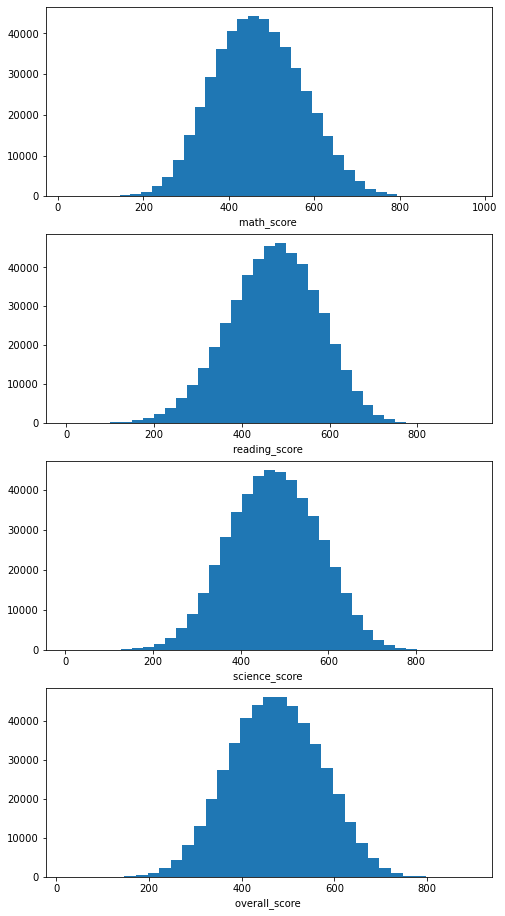

In [8]:
# re-plot the distribution of scores.
fig, ax = plt.subplots(nrows=4, figsize = [8,16])
bin_size = 25
variables = ['math_score', 'reading_score', 'science_score', 'overall_score']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df[var]), max(df[var])+bin_size, bin_size)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('{} '.format(var))

plt.show()

- The scores of the three disciplines present a normal distribution with an overall score mean close to 500 points out of 1000.

### Time

In [9]:
#Change learning time from minutes to hours and caalculate total study time
df['math_learning_time'] = df['math_learning_time']/60
df['language_learning_time'] = df['language_learning_time']/60
df['science_learning_time'] = df['science_learning_time']/60
df['total_learning_time'] = (df['math_learning_time'] + df['language_learning_time'] + df['science_learning_time'])
df.head()

<ipython-input-9-20a5e5b642f8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['math_learning_time'] = df['math_learning_time']/60
<ipython-input-9-20a5e5b642f8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language_learning_time'] = df['language_learning_time']/60
<ipython-input-9-20a5e5b642f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

,country,gender,age,immigration_status,international_language_home,cultural_dist,family_structure,highest_education_parents,home_educational_resources,wealth,...,sense_belonging,time_computer_use,language_learning_time,math_learning_time,science_learning_time,math_score,reading_score,science_score,overall_score,total_learning_time
0,Albania,Female,16.17,Native,Language of the test,NaN,2.0,"ISCED 3A, ISCED 4",-1.29,-2.92,...,-1.18,NaN,NaN,NaN,NaN,406.8469,249.5762,341.7009,332.708000,NaN
1,Albania,Female,16.17,Native,Language of the test,NaN,2.0,"ISCED 5A, 6",1.12,0.69,...,NaN,NaN,5.25,4.50,1.5,486.1427,406.2936,548.9929,480.476400,11.25
2,Albania,Female,15.58,Native,Language of the test,NaN,2.0,"ISCED 5A, 6",-0.69,-0.23,...,NaN,NaN,5.00,NaN,NaN,533.2684,401.2100,499.6643,478.047567,NaN
3,Albania,Female,15.67,Native,Language of the test,NaN,2.0,"ISCED 5A, 6",0.04,-1.17,...,NaN,NaN,2.25,2.25,1.5,412.2215,547.3630,438.6796,466.088033,6.00
4,Albania,Female,15.50,Native,Language of the test,NaN,2.0,"ISCED 3A, ISCED 4",-0.69,-1.17,...,2.63,NaN,NaN,NaN,NaN,381.9209,311.7707,361.5628,351.751467,NaN


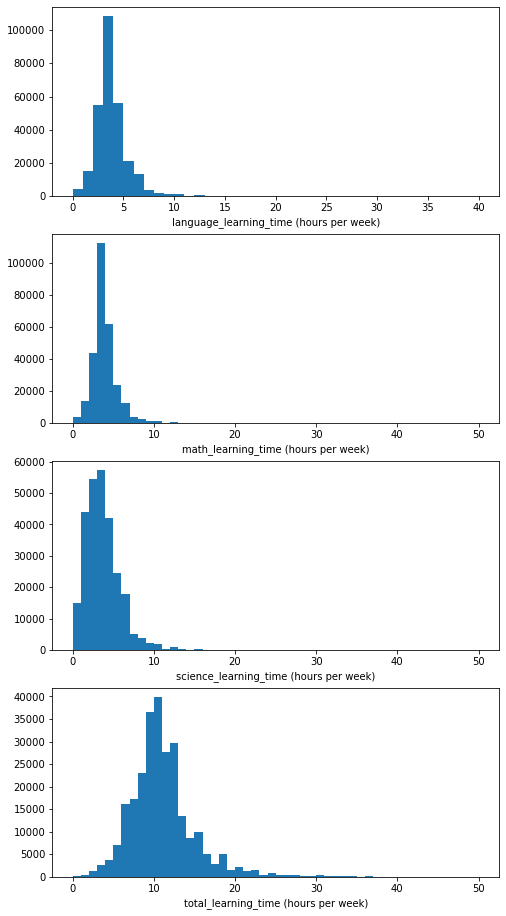

In [10]:
# re-plot the distribution of time studying.
fig, ax = plt.subplots(nrows=4, figsize = [8,16])
bin_size = 1
variables = ['language_learning_time', 'math_learning_time', 'science_learning_time', 'total_learning_time']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(np.nanmin(df[var]), np.nanmax(df[var])+bin_size, bin_size)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('{} (hours per week)'.format(var))
    
plt.show()

- The study time distributions show roughly a normal centred distribution around 3-4 hours per week. In the case of the total learning time, the mean is around 11 hours per week.

- There is a long tail distribution to the left, so it's convenient to plot the x-axis on a logarithmic scale.

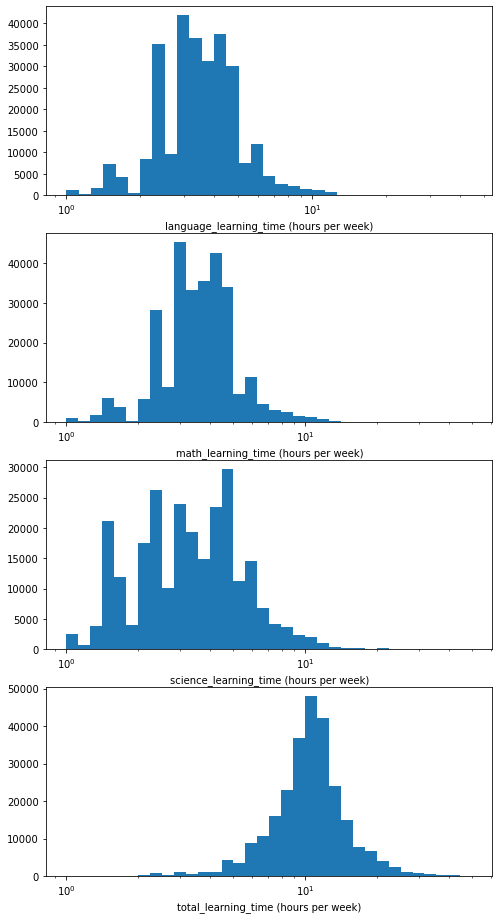

In [11]:
# re-plot the distribution of time studying on a log scale
fig, ax = plt.subplots(nrows=4, figsize = [8,16])
log_bin_size = 0.05
variables = ['language_learning_time', 'math_learning_time', 'science_learning_time', 'total_learning_time']
for i in range(len(variables)):
    var = variables[i]
    bins = 10 ** np.arange(np.nanmin(df[var]), np.log10(df[var].max())+log_bin_size, log_bin_size)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xscale('log')
    ax[i].set_xlabel('{} (hours per week)'.format(var))
    
plt.show()

In [12]:
#Change computer use in hours
df['time_computer_use'] = df['time_computer_use']/60

<ipython-input-12-bade63978baa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_computer_use'] = df['time_computer_use']/60


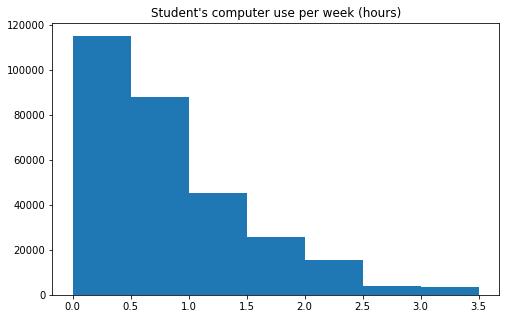

In [13]:
#Computer use
plt.figure(figsize=[8, 5])
bin_size = 0.5
bins = np.arange(np.nanmin(df['time_computer_use']), np.nanmax(df['time_computer_use']) + bin_size, bin_size)
plt.hist(data = df, x = 'time_computer_use', bins = bins);
plt.title("Student's computer use per week (hours)");

- Computer use shows a decreasing trend, with most students using the computer less than one hour per week and only a few reaching a maximum of 3.5 hours per week.

### Family context

In [14]:
#Family structure: Change labels
df['family_structure'] = df['family_structure'].map({1.0: "Single parent", 2.0: "Two parents", 3.0: "No parents"})

<ipython-input-14-58c74fbcd7f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['family_structure'] = df['family_structure'].map({1.0: "Single parent", 2.0: "Two parents", 3.0: "No parents"})


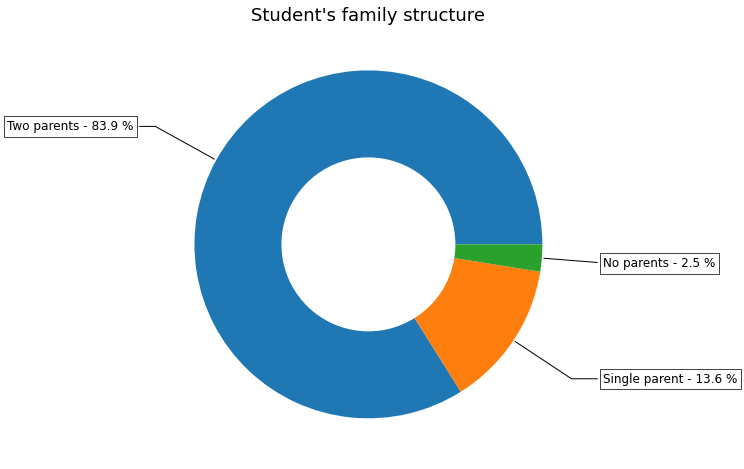

In [15]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

#Create variables and labels showing percentage
sizes = df.family_structure.value_counts()
percentage = 100 * (sizes.values/sizes.sum())
labels = [f'{i} - {j:1.1f} %' for i,j in zip(sizes.index, percentage)]

wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=0)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw, fontsize= 12)

ax.set_title("Student's family structure", fontsize=18)

plt.show()

- The vast majority of students, 83.9%, come from a two-parent family, while those who have grown up in a single-parent family or without parents account for 13.6% and 2.5%, respectively.

In [16]:
#Order categories of parent'seducation
parent_edu_dtype = pd.api.types.CategoricalDtype(
                    categories=['None','ISCED 1','ISCED 2','ISCED 3B, C','ISCED 3A, ISCED 4','ISCED 5B','ISCED 5A, 6'],
                    ordered=True)
df['highest_education_parents'] = df['highest_education_parents'].astype(parent_edu_dtype)
print(df.highest_education_parents.unique())

['ISCED 3A, ISCED 4', 'ISCED 5A, 6', 'ISCED 3B, C', 'ISCED 2', 'ISCED 5B', 'None', 'ISCED 1', NaN]
Categories (7, object): ['None' < 'ISCED 1' < 'ISCED 2' < 'ISCED 3B, C' < 'ISCED 3A, ISCED 4' < 'ISCED 5B' < 'ISCED 5A, 6']


<ipython-input-16-da3278ca6b82>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['highest_education_parents'] = df['highest_education_parents'].astype(parent_edu_dtype)


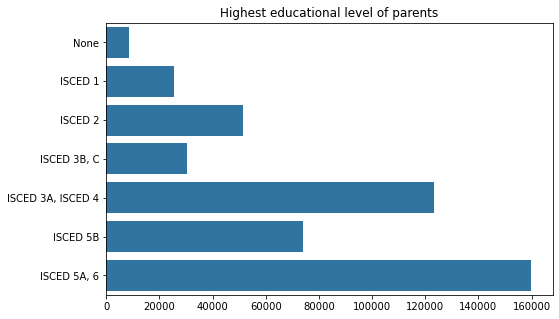

In [17]:
#Highest educational level of parents
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.countplot(data = df, y = 'highest_education_parents', color = base_color).set(xlabel = None, ylabel = None)
plt.title('Highest educational level of parents');

- The most common family educational level (maximum graduation of one or both parents) is ISCED 5A, 6 while the least common is not having an elementary school certificate.

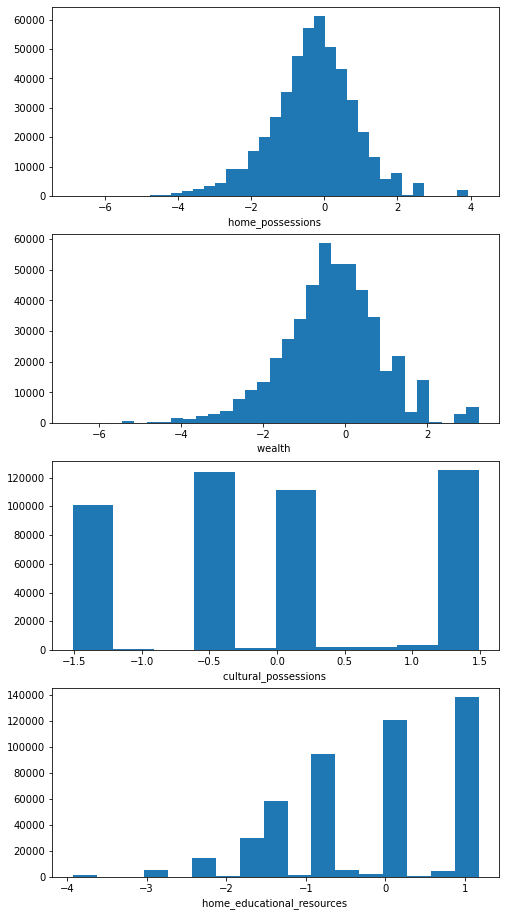

In [18]:
# re-plot the distribution of possessions.
fig, ax = plt.subplots(nrows=4, figsize = [8,16])
bin_size = 0.3
variables = ['home_possessions', 'wealth', 'cultural_possessions', 'home_educational_resources']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(np.nanmin(df[var]), np.nanmax(df[var])+bin_size, bin_size)
    ax[i].hist(data = df, x = var, bins = bins)
    ax[i].set_xlabel('{} '.format(var))

plt.show()

- Both household possessions and wealth follow a normal distribution centred on 0. Cultural possessions and educational resources show very long bars between which there are empty valleys. In the case of educational resources, the bars showing the number of students follow a linear increasing trend. 

### Immigration

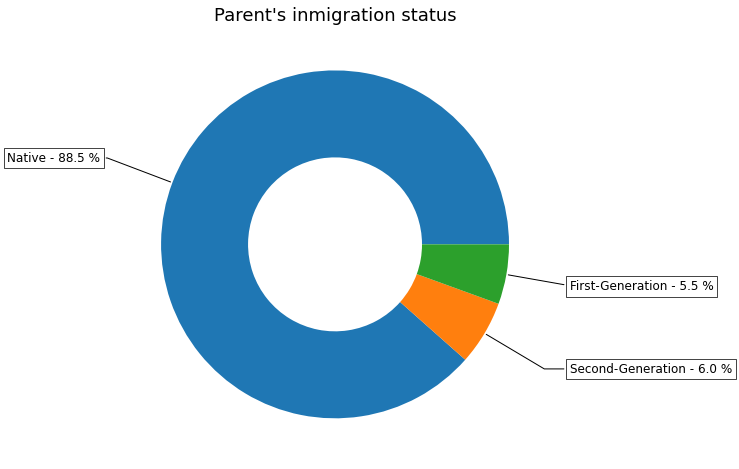

In [19]:
#Immigration status

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

#Create variables and labels showing percentage
sizes = df.immigration_status.value_counts()
percentage = 100 * (sizes.values/sizes.sum())
labels = [f'{i} - {j:1.1f} %' for i,j in zip(sizes.index, percentage)]

wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=0)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw, fontsize= 12)

ax.set_title("Parent's inmigration status", fontsize=18)

plt.show()


- A total of 88.5% of students' parents are natives of the country in which the student was tested. Students with second-generation parents, those born in the same country as the test but whose parents were immigrants, account for 6.0% of the student population. And finally, students with first-generation parents account for 5.5% of the population tested.

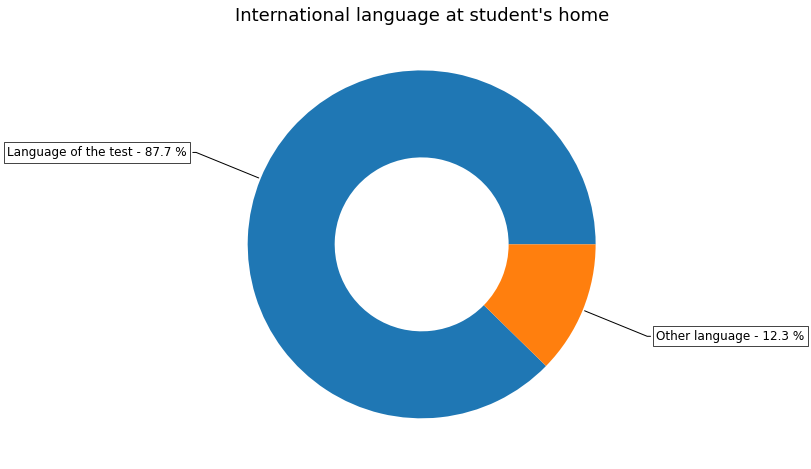

In [20]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

#Create variables and labels showing percentage
sizes = df.international_language_home.value_counts()
percentage = 100 * (sizes.values/sizes.sum())
labels = [f'{i} - {j:1.1f} %' for i,j in zip(sizes.index, percentage)]

wedges, texts = ax.pie(sizes, wedgeprops=dict(width=0.5), startangle=0)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw, fontsize= 12)

ax.set_title("International language at student's home", fontsize=18)

plt.show()

- The majority of students, 87.7%, use the same language at home as the language in which they took the test.

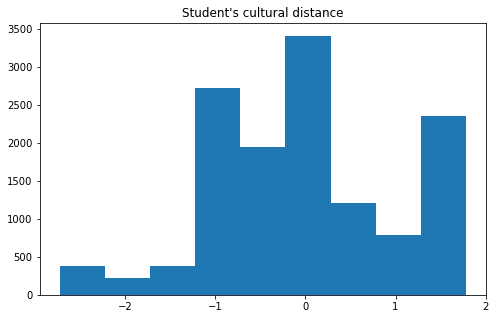

In [21]:
#Cultural distance
plt.figure(figsize=[8, 5])
bin_size = 0.5
bins = np.arange(np.nanmin(df['cultural_dist']), np.nanmax(df['cultural_dist'])+bin_size, bin_size)
plt.hist(data = df, x = 'cultural_dist', bins = bins)
plt.title("Student's cultural distance");

- Most immigrant students have a moderate cultural distance.

### Psichological factors

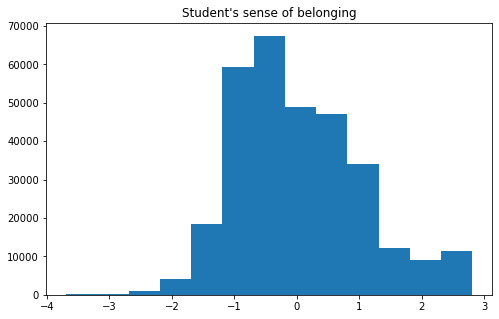

In [22]:
#Sense of belonging
plt.figure(figsize=[8, 5])
bin_size = 0.5
bins = np.arange(np.nanmin(df['sense_belonging']), np.nanmax(df['sense_belonging'])+bin_size, bin_size)
plt.hist(data = df, x = 'sense_belonging', bins = bins)
plt.title("Student's sense of belonging");

- Most students show a moderate sense of belonging to the school, although there are more students who show a strong sense of belonging than a very weak one.

In [23]:
#Order categories of perceived control
preceived_dtype = pd.api.types.CategoricalDtype(
                    categories=['Strongly disagree','Disagree','Agree','Strongly agree'],
                    ordered=True)
df['perceived_control'] = df['perceived_control'].astype(preceived_dtype)
print(df.perceived_control.unique())

['Agree', 'Strongly agree', NaN, 'Disagree', 'Strongly disagree']
Categories (4, object): ['Strongly disagree' < 'Disagree' < 'Agree' < 'Strongly agree']


<ipython-input-23-c1038765715d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['perceived_control'] = df['perceived_control'].astype(preceived_dtype)


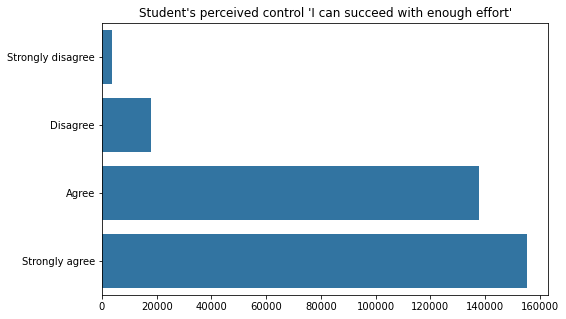

In [24]:
#Perceived control
plt.figure(figsize=[8, 5])
sb.countplot(data = df, y = 'perceived_control', color = base_color).set(xlabel = None, ylabel = None)
plt.title("Student's perceived control 'I can succeed with enough effort'");

- Very few students disagree with the statement 'I can succeed with enough effort'.

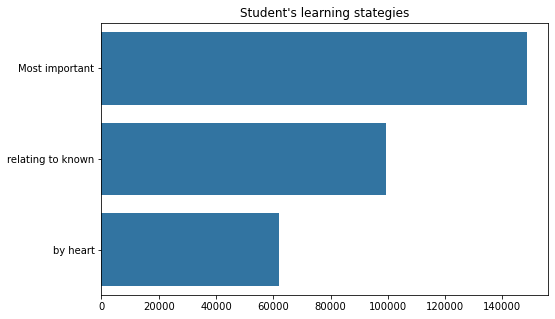

In [25]:
#Learning strategies
plt.figure(figsize=[8, 5])
order_strategies = df.learning_strategies.value_counts().index
sb.countplot(data = df, y = 'learning_strategies', color = base_color, order = order_strategies).set(xlabel = None, ylabel = None)
plt.title("Student's learning stategies");

- The most commonly used learning strategy is to study the most important parts of a discipline, followed by relating new knowledge to existing knowledge. The least used strategy is to learn by heart.

## Bivariate Exploration

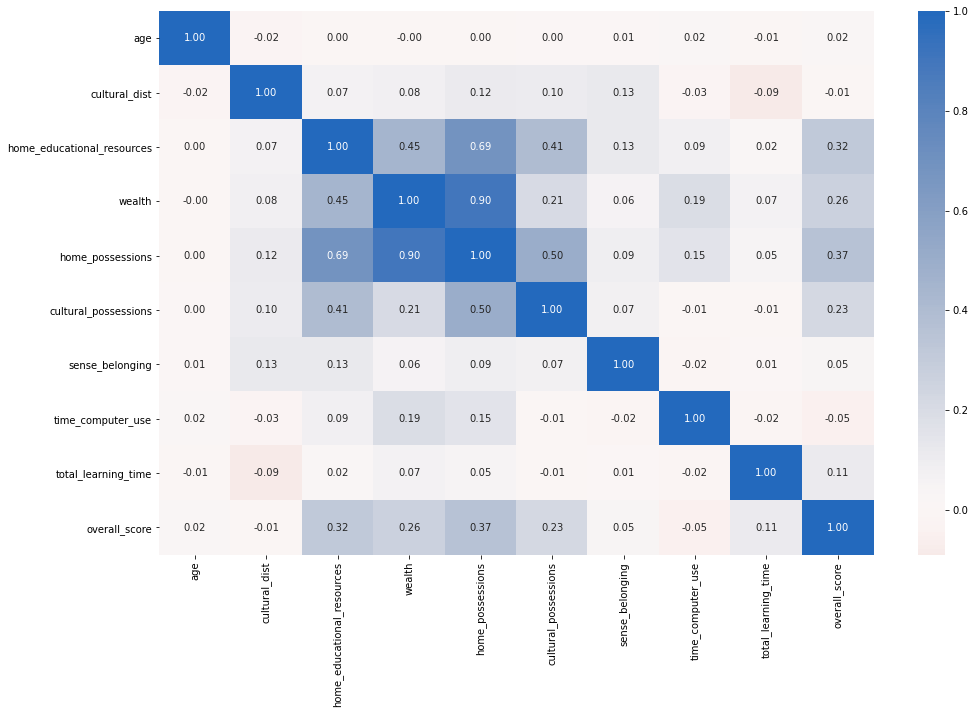

In [26]:
# correlation plot
numeric_vars = ['age', 'cultural_dist', 'home_educational_resources' , 'wealth', 'home_possessions', 'cultural_possessions', 
               'sense_belonging', 'time_computer_use', 'total_learning_time', 'overall_score']

plt.figure(figsize = [16, 10])
sb.heatmap(df[numeric_vars].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

- The numerical variables that affect the final grade the most are possessions, especially educational resources, and study time. 

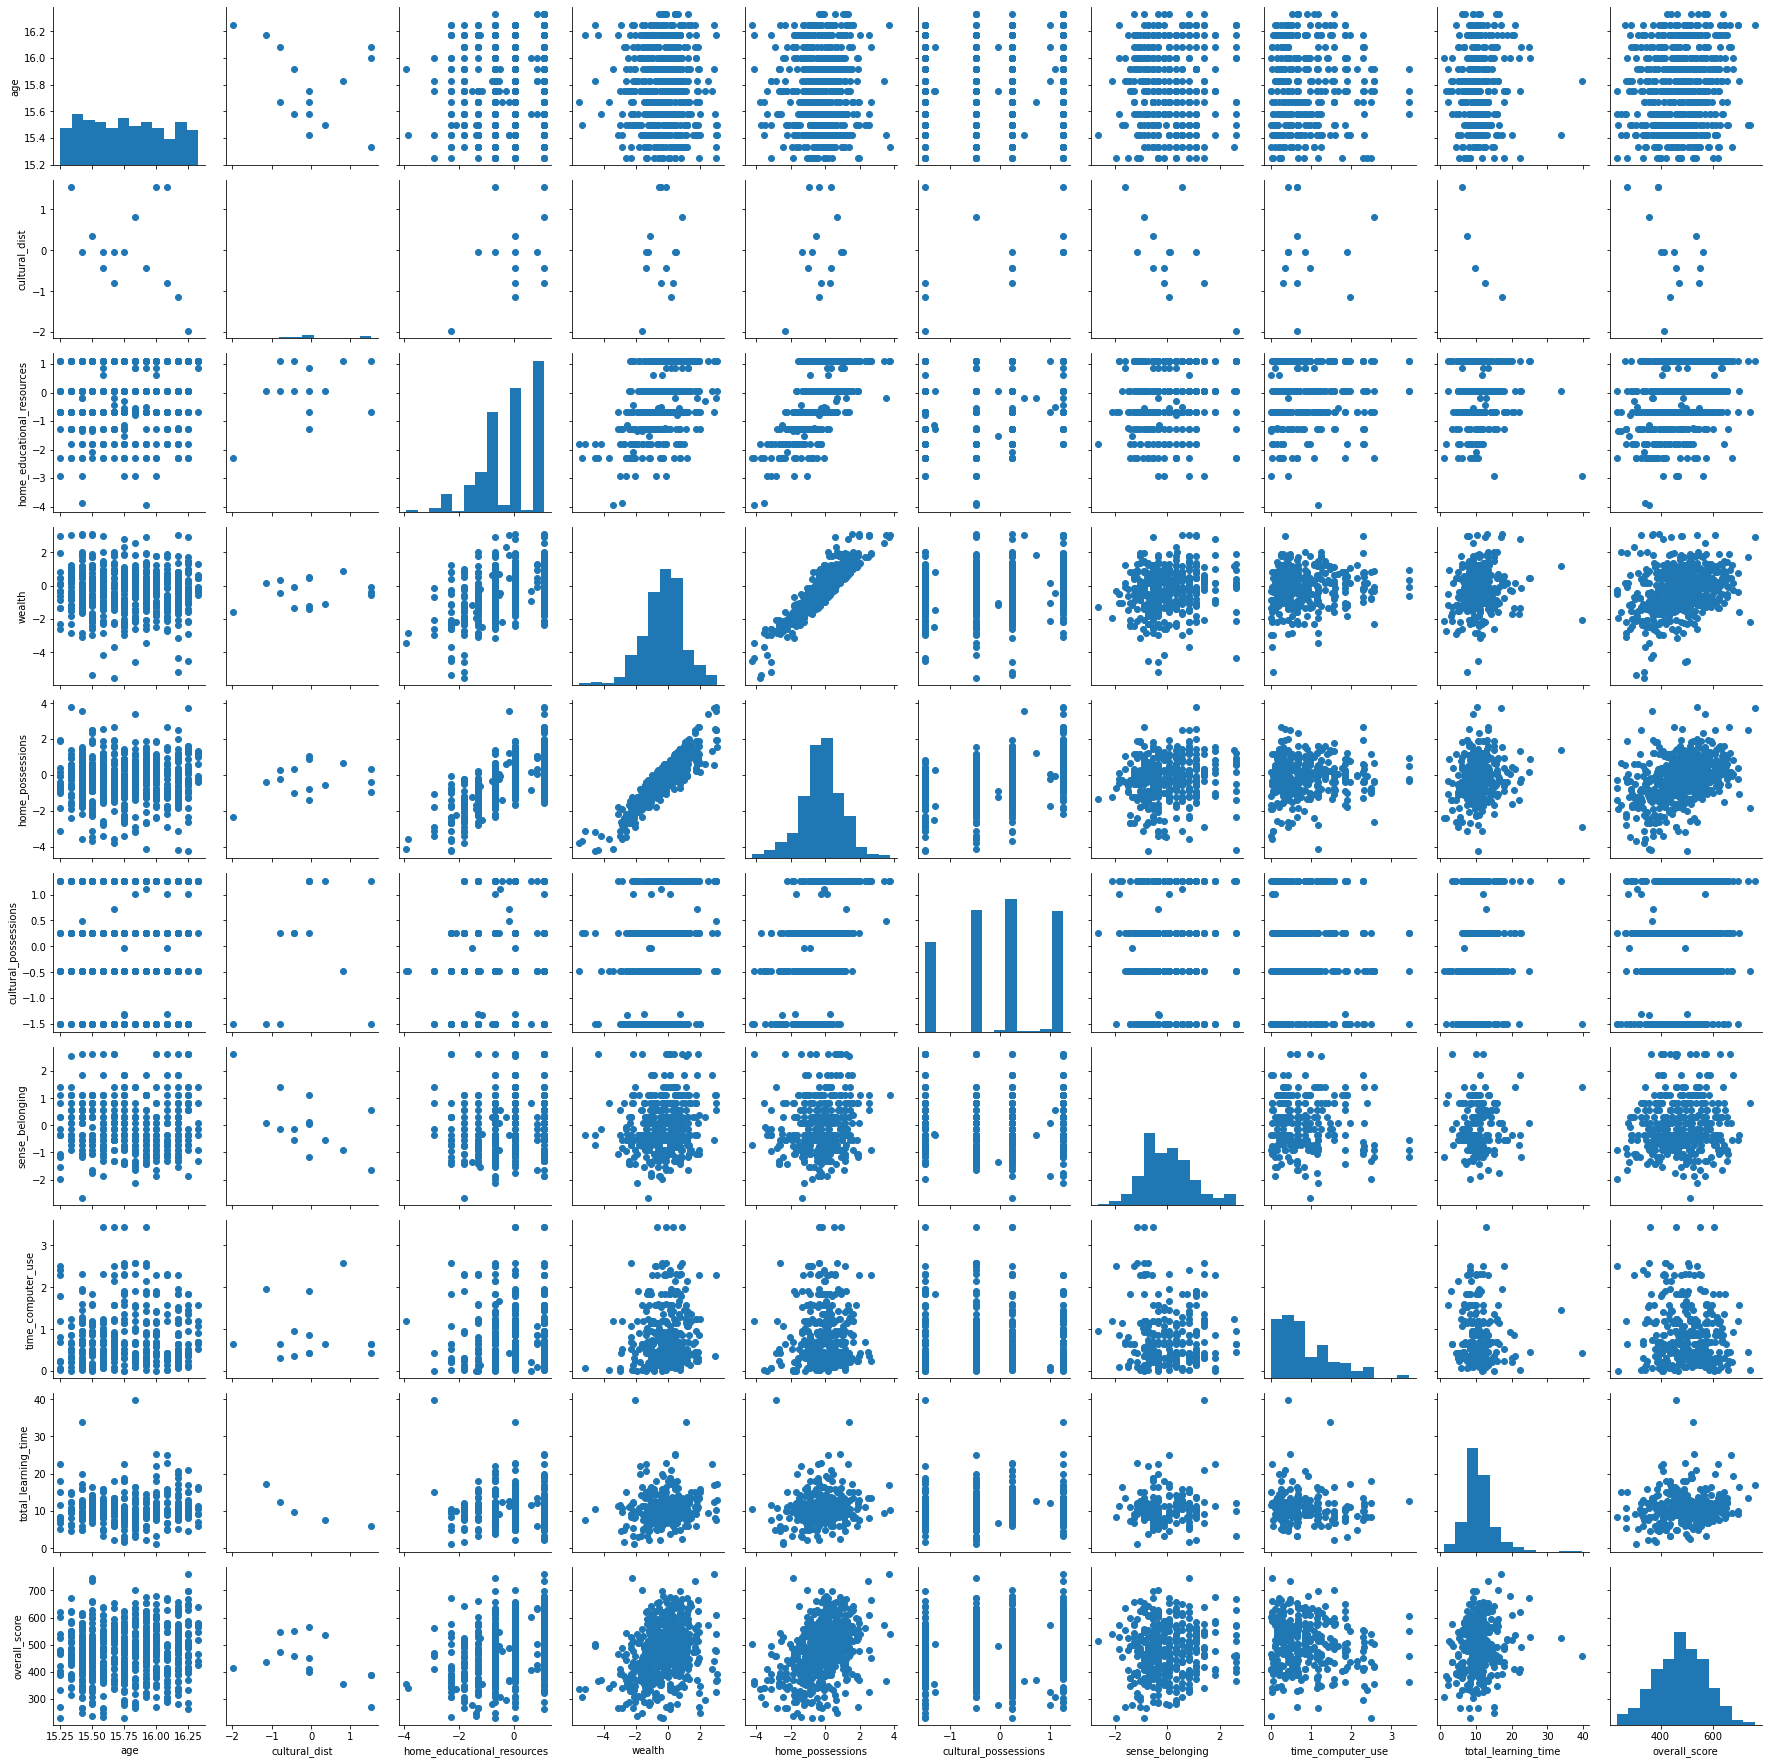

In [27]:
#scatter matrix of numeric variables
random = np.random.choice(df.shape[0], 600, replace = False)
sample = df.loc[random, :]

g = sb.PairGrid(data = sample, vars = numeric_vars)
g.map_diag(plt.hist, bins = 12)
g.map_offdiag(plt.scatter)

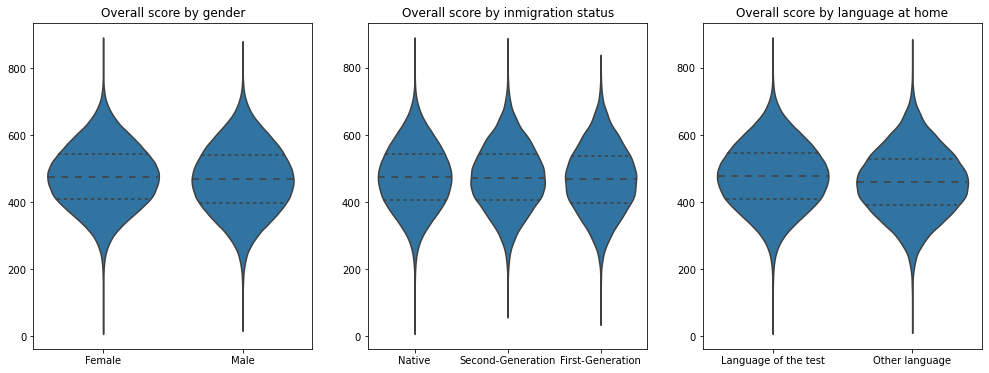

In [28]:
#Violin plot of categorical values
plt.figure(figsize = [17, 6])

plt.subplot(1, 3, 1)
sb.violinplot(data = df, x = 'gender', y = 'overall_score', color = base_color,
              inner="quartile").set(xlabel = None, ylabel = None)
plt.title('Overall score by gender');

plt.subplot(1, 3, 2)
sb.violinplot(data = df, x = 'immigration_status', y = 'overall_score', color = base_color,
              inner="quartile").set(xlabel = None, ylabel = None)
plt.title('Overall score by inmigration status');

plt.subplot(1, 3, 3)
sb.violinplot(data = df, x = 'international_language_home', y = 'overall_score', color = base_color,
              inner="quartile").set(xlabel = None, ylabel = None)
plt.title('Overall score by language at home');


- Girls tend to have a slightly better overall score.
- Immigration status do not seem to significantly affect students' overall score.
- To have a foreign language at home seems to decrease students' overall score by a few points, which could be due to difficulties with the reading test.


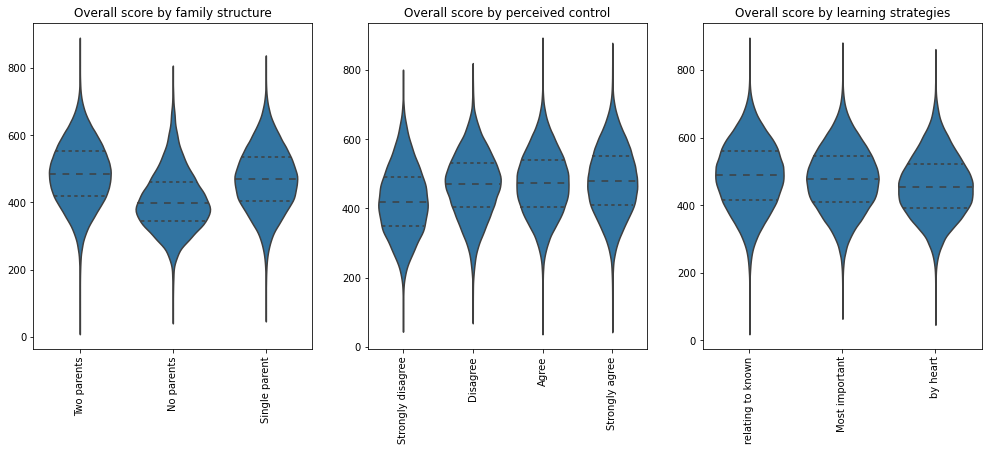

In [29]:
plt.figure(figsize = [17, 6])

plt.subplot(1, 3, 1)
sb.violinplot(data = df, x = 'family_structure', y = 'overall_score', color = base_color,
              inner="quartile").set(xlabel = None, ylabel = None)
plt.title('Overall score by family structure')
plt.xticks(rotation=90);

plt.subplot(1, 3, 2)
sb.violinplot(data = df, x = 'perceived_control', y = 'overall_score', color = base_color,
              inner="quartile").set(xlabel = None, ylabel = None)
plt.title('Overall score by perceived control')
plt.xticks(rotation=90);


plt.subplot(1, 3, 3)
sb.violinplot(data = df, x = 'learning_strategies', y = 'overall_score', color = base_color,
              inner="quartile").set(xlabel = None, ylabel = None)
plt.title('Overall score by learning strategies')
plt.xticks(rotation=90);

- Students with one- and two-parent families show similar mean scores, while those students who grew up without parents show an overall score of almost 100 points lower.

- Students who strongly disagree with the statement 'I can succeed with enough effort' show lower overall scores than the rest of the students.

- The most effective learning strategies in decreasing order are: relating to existing concepts, studying what is most important, and studying from memory.

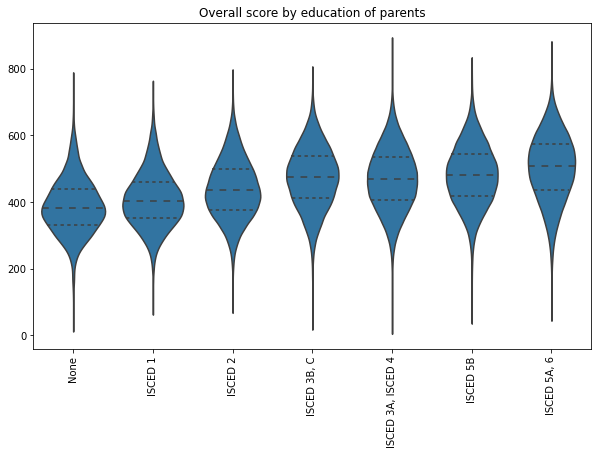

In [30]:
plt.figure(figsize = [10, 6])
sb.violinplot(data = df, x = 'highest_education_parents', y = 'overall_score', color = base_color,
              inner="quartile").set(xlabel = None, ylabel = None)
plt.title('Overall score by education of parents')
plt.xticks(rotation=90);


- The higher the educational level of the parents, the better the average scores shown by the students.

It seems that the categorical variables that most affect the overall score, in order of importance are: 
    
- Parents' education: the higher the parents' educational level, the better scores their children have.
    
- Family structure: the overall score is similar in students with two-parent or single-parent families, but decreases significantly in the case of students who have grown up without any parent.
    
- Perceived control: children who do not believe that effort will help them to succeed tend to have lower grades.
    
The other variables do not seem to have much influence on the final grade, although it is seen slightly that girls have a better grade and students who learn the disciplines by heart tend to have worse performance.      

## Multivariate exploration

In [31]:
#Create a new variable of social class with the value limits -1.5 and 1.5 in the column home_possessions
df.loc[(df['home_possessions'] < -1), 'social_class'] = 'low'
df.loc[(df['home_possessions'] > -1) & (df['home_possessions'] <= 1), 'social_class'] = 'middle'
df.loc[(df['home_possessions'] > 1), 'social_class'] = 'high'

#Order categories of social class
social_class_dtype = pd.api.types.CategoricalDtype(
                    categories=['low','middle','high'], ordered=True)
df['social_class'] = df['social_class'].astype(social_class_dtype)
print(df.social_class.unique())

random = np.random.choice(df.shape[0], 25000, replace = False)
sample = df.loc[random, :]

['low', 'high', 'middle', NaN]
Categories (3, object): ['low' < 'middle' < 'high']


C:\Users\rvile\anaconda3\envs\visualization\lib\site-packages\pandas\core\indexing.py:1598: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\rvile\anaconda3\envs\visualization\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\rvile\anaconda3\envs\visualization\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a co

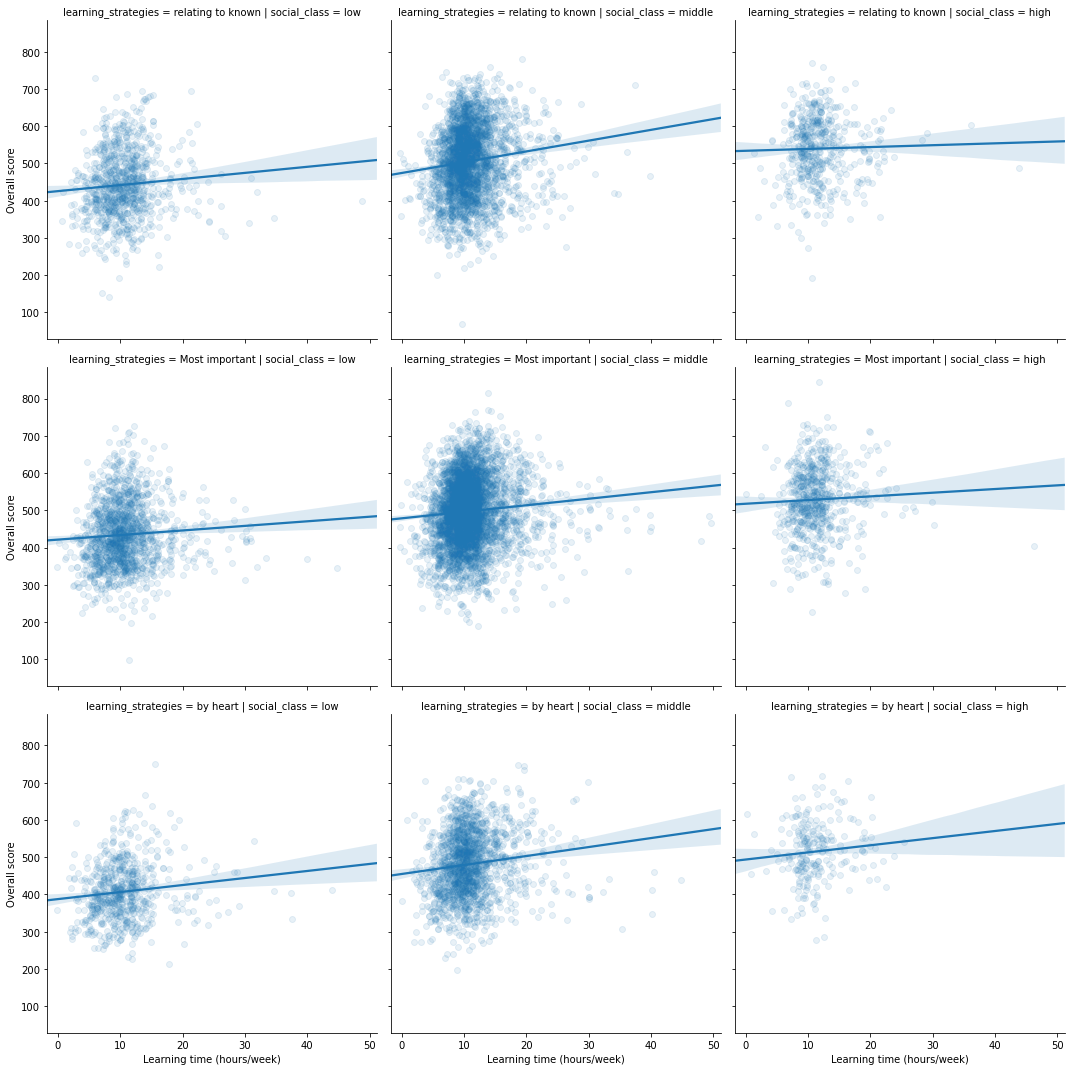

In [32]:
g = sb.FacetGrid(data = sample, col = 'social_class', row = 'learning_strategies', height = 5)
g.map(sb.regplot, 'total_learning_time', 'overall_score', fit_reg = True,
      truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/10})

g.set_xlabels('Learning time (hours/week)')
g.set_ylabels('Overall score')
plt.show()

- The graph does not clarify well the relationship between the variables, it will be necessary to create a new column dividing the study time into several bins.

In [33]:
#Create a new variable of time with the value limits in 5, 10, 15 and 20 hours
df.loc[(df['total_learning_time'] < 5), 'time_bins'] = 'Up to 5 hours'
df.loc[(df['total_learning_time'] > 5) & (df['home_possessions'] <= 10), 'time_bins'] = 'From 5 to 10 hours'
df.loc[(df['total_learning_time'] > 10) & (df['home_possessions'] <= 15), 'time_bins'] = 'From 10 to 15 hours'
df.loc[(df['total_learning_time'] > 15) & (df['home_possessions'] <= 20), 'time_bins'] = 'From 15 to 20 hours'
df.loc[(df['total_learning_time'] > 20), 'time_bins'] = 'More than 20 hours'

#Order categories of time bins
time_dtype = pd.api.types.CategoricalDtype(
                    categories=['Up to 5 hours','From 5 to 10 hours','From 10 to 15 hours',
                                'From 15 to 20 hours', 'More than 20 hours'], ordered=True)
df['time_bins'] = df['time_bins'].astype(time_dtype)
print(df.time_bins.unique())

[NaN, 'From 10 to 15 hours', 'From 5 to 10 hours', 'From 15 to 20 hours', 'Up to 5 hours', 'More than 20 hours']
Categories (5, object): ['Up to 5 hours' < 'From 5 to 10 hours' < 'From 10 to 15 hours' < 'From 15 to 20 hours' < 'More than 20 hours']


C:\Users\rvile\anaconda3\envs\visualization\lib\site-packages\pandas\core\indexing.py:1598: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\rvile\anaconda3\envs\visualization\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\rvile\anaconda3\envs\visualization\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a co

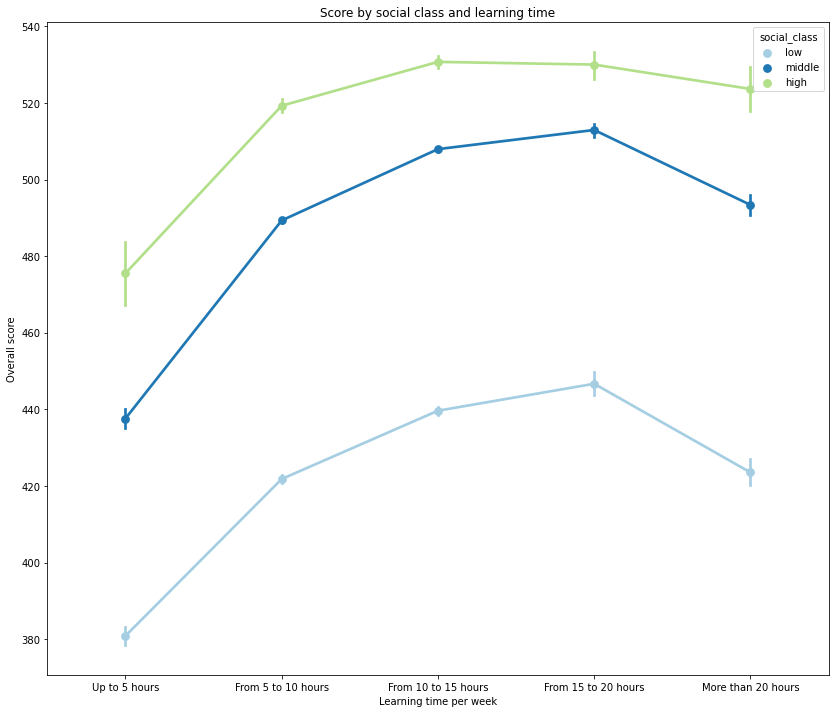

In [34]:
plt.figure(figsize = [14, 12])
sb.pointplot(data = df, x = 'time_bins', y = 'overall_score', hue = 'social_class', palette = "Paired")
plt.xlabel("Learning time per week")
plt.ylabel('Overall score')
plt.title('Score by social class and learning time');

- Social class, measured as the number of belongings at home, affects the student's overall score, with a difference of almost 100 points between the high and low social class. The average difference between the high and middle class is 40 points.
- More study time improves the student's score as long as this time does not exceed 20 hours per week. The most efficient weekly amount of study is between 5 and 20 hours, with only a 20-point variation.

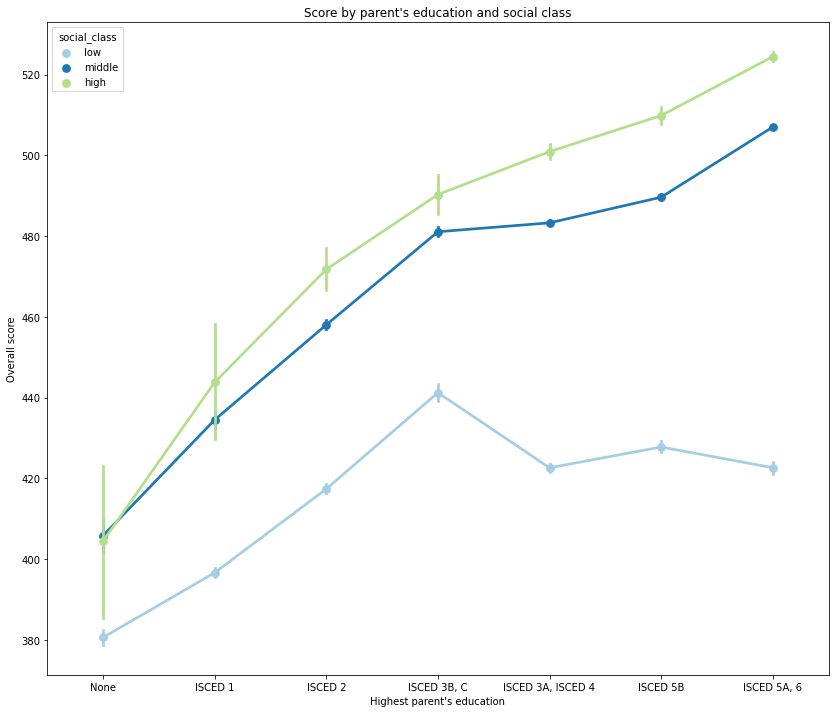

In [35]:
plt.figure(figsize = [14, 12])
sb.pointplot(data = df, x = 'highest_education_parents', y = 'overall_score', hue = 'social_class', palette = "Paired")
plt.xlabel("Highest parent's education")
plt.ylabel('Overall score')
plt.title("Score by parent's education and social class");

- A higher level of education has a positive impact on the student's overall grade in the middle and upper social classes. However, in the lower social class, the maximum grade peak is reached with a parental education of ISCED 3B, 4. 

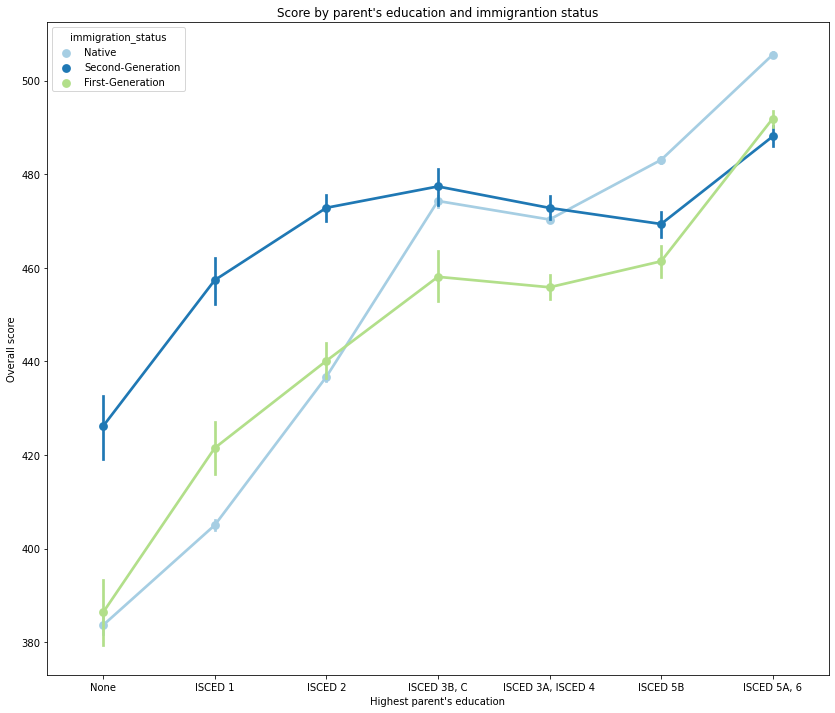

In [36]:
plt.figure(figsize = [14, 12])
sb.pointplot(data = df, x = 'highest_education_parents', y = 'overall_score', hue = 'immigration_status', palette = "Paired")
plt.xlabel("Highest parent's education")
plt.ylabel('Overall score')
plt.title("Score by parent's education and immigrantion status");

- Although the impact of parents' educational background is positively related to students' grades, it is more influential in families with native-born parents. In the case of parents with an educational level up to ISCED 2, students with second-generation immigrant parents show better test scores.

- Contrary to what was thought at the beginning of this project, the variables that most affect the student's overall score are those of the family context, more specifically the educational level of the parents and the number of possessions at home. Although study time also affects the result, it does so in a more modest way.